<a href="https://colab.research.google.com/github/MartinaPolehlova/Final_projekt_last_CZ/blob/main/FInal_projekt_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proměnné

In [199]:
#Loan_ID: Jedinečné ID půjčky.
#Pohlaví: Buď muž, nebo žena.
#Ženatý: Počasí Ženatý (ano) nebo ne bojový (Ne).
#Závislé osoby: Počet osob v závislosti na klientovi.
#Vzdělání: Vzdělání žadatele (absolventské nebo vysokoškolské).
#Self_Employed: Osoba samostatně výdělečně činná (ano/ne).
#Příjem žadatele: Příjem žadatele.
#Příjem spolužadatele: Příjem spolužadatele.
#Částka půjčky: Výše půjčky v tisících.
#Loan_Amount_Term: Doba splatnosti úvěru v měsících.
#Credit_History: Úvěrová historie splňuje pokyny.
#Property_Area: Žadatelé žijí buď ve městě, poloměstě nebo na venkově.
#Loan_Status: Půjčka schválena (A/N).

Importování knihoven

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Načtení dat

In [201]:
data = pd.read_csv('loan_data.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Chybějící hodnoty

In [202]:
data.isna().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


Datové typy

In [203]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


Počet sloupců a řádků

In [204]:
data.shape

(381, 13)

Popis dat

In [205]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [206]:
loan_amount_term_stats = data['Loan_Amount_Term'].describe()
credit_history_stats = data['Credit_History'].describe()
ApplicantIncome_stats = data['ApplicantIncome'].describe()
# Categorical columns: 'Gender', 'Dependents', and 'Self_Employed'
gender_distribution = data['Gender'].value_counts(normalize=True)
dependents_distribution = data['Dependents'].value_counts(normalize=True)
self_employed_distribution = data['Self_Employed'].value_counts(normalize=True)
loan_amount_term_stats, ApplicantIncome_stats, credit_history_stats, gender_distribution, dependents_distribution

(count    370.000000
 mean     340.864865
 std       68.549257
 min       12.000000
 25%      360.000000
 50%      360.000000
 75%      360.000000
 max      480.000000
 Name: Loan_Amount_Term, dtype: float64,
 count     381.000000
 mean     3579.845144
 std      1419.813818
 min       150.000000
 25%      2600.000000
 50%      3333.000000
 75%      4288.000000
 max      9703.000000
 Name: ApplicantIncome, dtype: float64,
 count    351.000000
 mean       0.837607
 std        0.369338
 min        0.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: Credit_History, dtype: float64,
 Gender
 Male      0.773936
 Female    0.226064
 Name: proportion, dtype: float64,
 Dependents
 0     0.627346
 2     0.158177
 1     0.139410
 3+    0.075067
 Name: proportion, dtype: float64)

In [207]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Drop Loan_ID

In [208]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [209]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Vyplnění proměnných modusem

In [210]:
for column in ['Gender', 'Self_Employed', 'Credit_History', 'Dependents']:
    mode_value = data[column].mode()[0]  # Get the mode value
    data[column] = data[column].fillna(mode_value)  # Replace NaN with mode

Zde jsem na základě describe zvolila median

In [211]:
# Convert Loan_Amount_Term to numeric and fill NaN with median, inplace
data['Loan_Amount_Term'] = pd.to_numeric(data['Loan_Amount_Term'])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

Kódování kategoriálních proměnných a přetypování na int

In [212]:
pd.set_option('future.no_silent_downcasting', True)
data['Gender']=data['Gender'].replace({"Male":1,'Female':0}).astype(int)
data['Married']=data['Married'].replace({'Yes':1,'No':0}).astype(int)
data['Dependents']=data['Dependents'].replace({'3+':3}).astype(int)
data['Education']=data['Education'].replace({'Graduate':1,'Not Graduate':0}).astype(int)
data['Self_Employed']=data['Self_Employed'].replace({'Yes':1,'No':0}).astype(int)
data['Property_Area']=data['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0}).astype(int)
data['Loan_Status']=data['Loan_Status'].replace({'Y':1,'N':0}).astype(int)


In [213]:
data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


Kontrola datového typu proměnných

In [214]:
data.dtypes
#hotové vše jako čísla :)

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


Kontrola dat okem v tabulce

In [215]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [216]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,1,0,5703,0.0,128.0,360.0,1.0,2,1
377,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1


Výčet sloupců

In [217]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


GRAFY

Distribuce numerických proměnných - boxplot

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       381.000000         381.000000  381.000000
mean       3579.845144        1277.275381  104.986877
std        1419.813818        2340.818114   28.358464
min         150.000000           0.000000    9.000000
25%        2600.000000           0.000000   90.000000
50%        3333.000000         983.000000  110.000000
75%        4288.000000        2016.000000  127.000000
max        9703.000000       33837.000000  150.000000


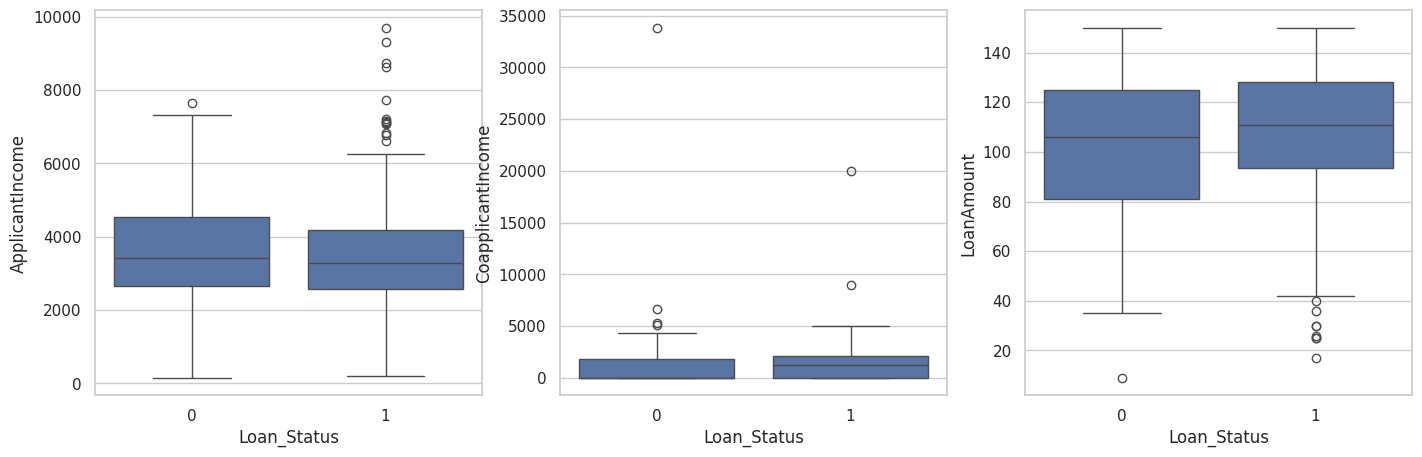

In [218]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numeric_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numeric_columns].describe())
plt.subplots_adjust(hspace=1)

Distribuce numerických proměnných - histogram

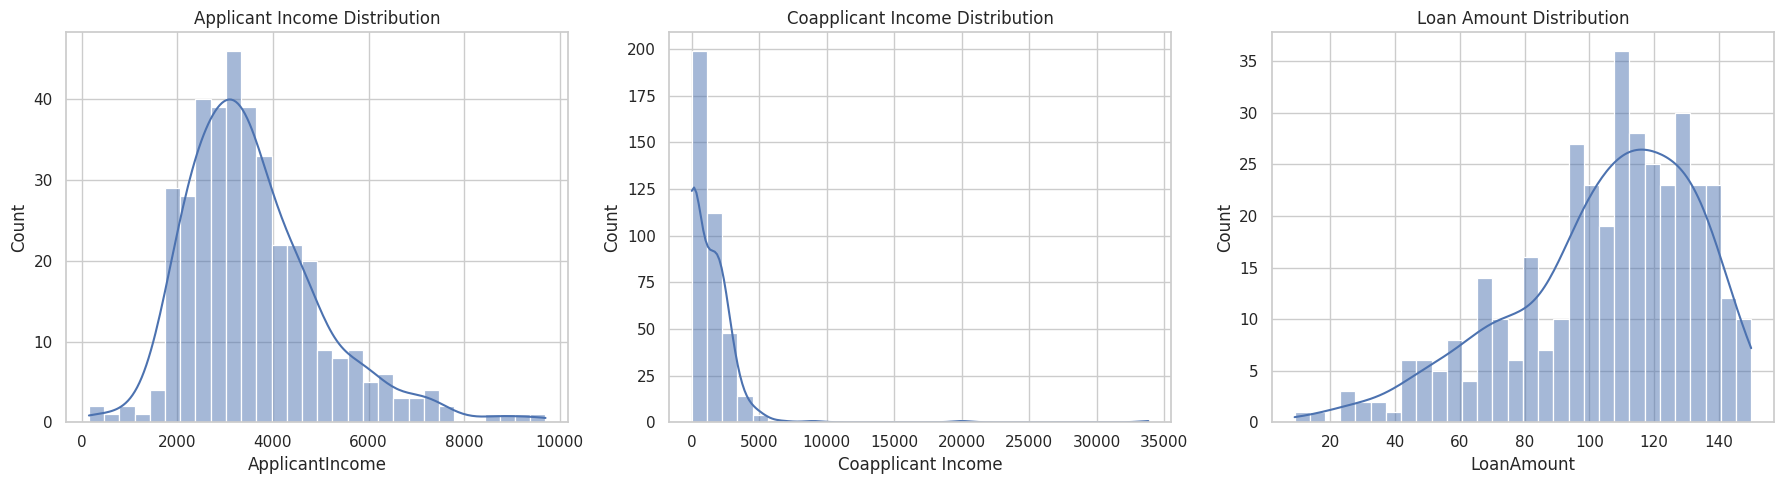

In [219]:
sns.set(style= 'whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.histplot(data['ApplicantIncome'], ax=axes[0], kde=True, bins=30)
axes[0].set_title('Applicant Income Distribution')
sns.histplot(data['CoapplicantIncome'], ax=axes[1], kde=True, bins=30)
axes[1].set_title('Coapplicant Income Distribution')
axes[1].set_xlabel('Coapplicant Income')
sns.histplot(data['LoanAmount'], ax=axes[2], kde=True, bins=30)
axes[2].set_title('Loan Amount Distribution')
plt.tight_layout()
plt.show()

Rozdělení kategoriálních proměnných

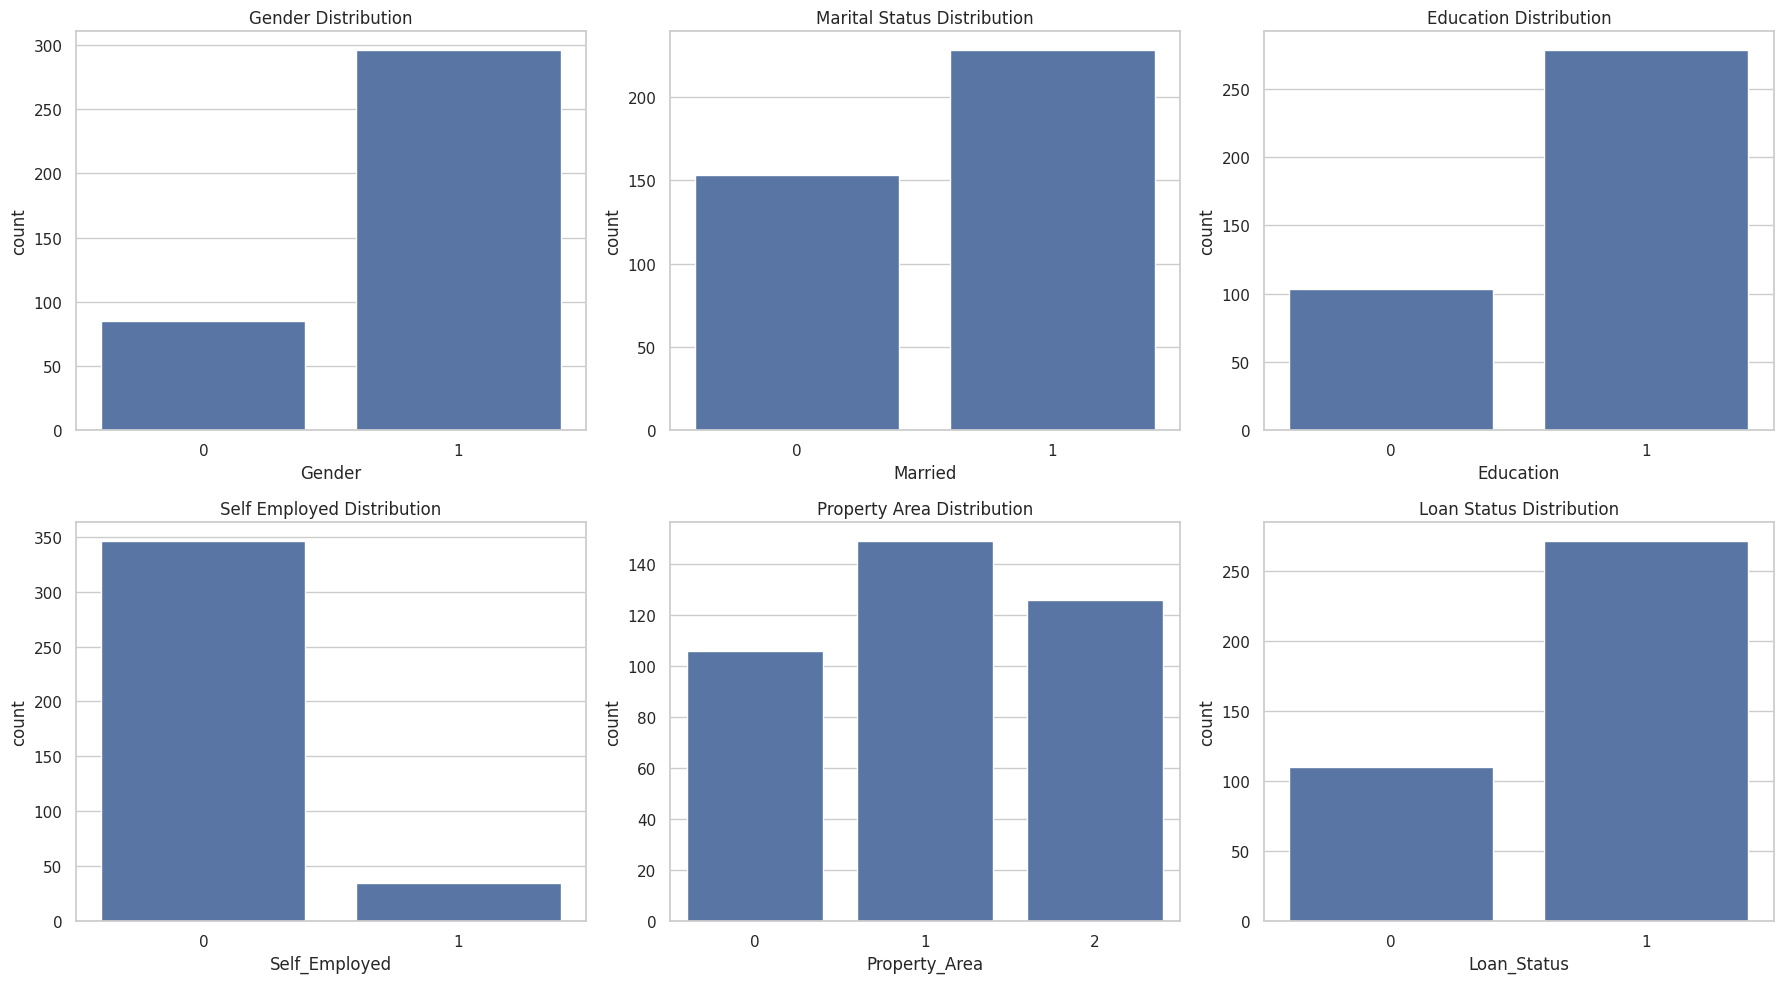

In [220]:
from typing_extensions import dataclass_transform
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
sns.countplot(x='Gender', data=data, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')
sns.countplot(x='Married', data=data, ax=axes[0,1])
axes[0,1].set_title('Marital Status Distribution')
sns.countplot(x='Education', data=data, ax=axes[0,2])
axes[0,2].set_title('Education Distribution')
sns.countplot(x='Self_Employed', data=data, ax=axes[1,0])
axes[1,0].set_title('Self Employed Distribution')
sns.countplot(x='Property_Area', data=data, ax=axes[1,1])
axes[1,1].set_title('Property Area Distribution')
sns.countplot(x='Loan_Status', data=data, ax=axes[1,2])
axes[1,2].set_title('Loan Status Distribution')
plt.tight_layout()
plt.show()

Korelační matice

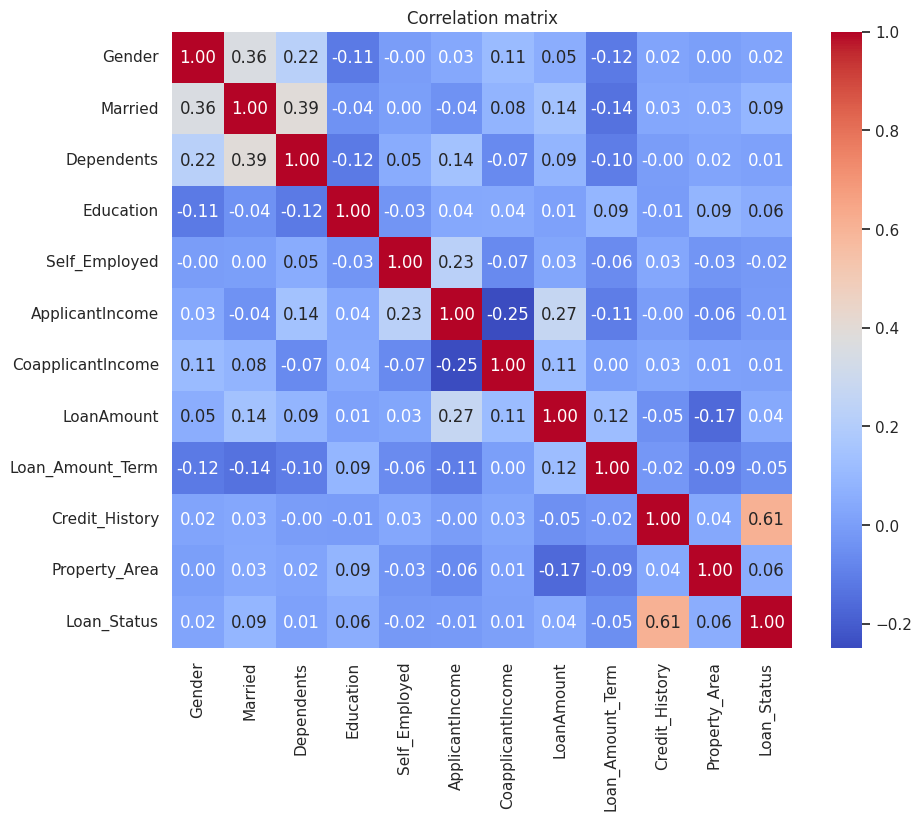

In [221]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

Příprava dat pro trénování modelu - preprocesing

In [222]:
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [223]:
X.shape, y.shape

((381, 11), (381,))

In [224]:
from sklearn.model_selection import train_test_split


Rozdělení dat a normalizace

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 14)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [226]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((304, 11), (304,), (77, 11), (77,))

Modely

In [227]:
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 14)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [228]:
# Model - rozhodovací strom
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 35, criterion='entropy', splitter='best')
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_DT)

Accuracy: 0.922077922077922


In [229]:
# Vytvoření přehledu důležitosti proměnných
importance = DT_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

              Feature  Importance
9      Credit_History    0.824356
10      Property_Area    0.070640
1             Married    0.064696
6   CoapplicantIncome    0.040307
0              Gender    0.000000
2          Dependents    0.000000
3           Education    0.000000
4       Self_Employed    0.000000
5     ApplicantIncome    0.000000
7          LoanAmount    0.000000
8    Loan_Amount_Term    0.000000


In [230]:
# Model - logistická regrese
from sklearn import linear_model
L_model = linear_model.LogisticRegression( max_iter=1000, C=0.1, penalty='l2', solver='liblinear')
L_model.fit(X_train, y_train)
y_pred = L_model.predict(X_test)
accuracy_L = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_L)

Accuracy: 0.922077922077922


In [231]:
#vytvoření přehledu důležitosti proměnných
importance = L_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

              Feature  Importance
9      Credit_History    1.098704
1             Married    0.217414
7          LoanAmount    0.137892
3           Education    0.135753
10      Property_Area    0.113883
4       Self_Employed    0.003691
0              Gender   -0.024708
2          Dependents   -0.036882
5     ApplicantIncome   -0.062906
6   CoapplicantIncome   -0.070357
8    Loan_Amount_Term   -0.083057


In [232]:
# Model - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf = 35, criterion='entropy')
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RF)


Accuracy: 0.7532467532467533


In [233]:
#vytvoření přehledu důležitosti proměnných
importance = RF_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

              Feature  Importance
6   CoapplicantIncome    0.219046
5     ApplicantIncome    0.212972
10      Property_Area    0.157909
7          LoanAmount    0.148168
1             Married    0.143925
3           Education    0.060702
2          Dependents    0.024753
0              Gender    0.023816
9      Credit_History    0.008709
4       Self_Employed    0.000000
8    Loan_Amount_Term    0.000000


In [234]:
# Model - GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
accuracy_GB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_GB)

Accuracy: 0.8181818181818182


In [235]:
#vytvoření přehledu důležitosti
importance = GB_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)



              Feature  Importance
9      Credit_History    0.410629
5     ApplicantIncome    0.216336
6   CoapplicantIncome    0.155518
7          LoanAmount    0.098038
8    Loan_Amount_Term    0.049562
10      Property_Area    0.041662
1             Married    0.012128
4       Self_Employed    0.007869
3           Education    0.005030
2          Dependents    0.002230
0              Gender    0.000999


In [236]:
# Model - Support Vector Classifier
from sklearn.svm import SVC
SVC_model = SVC(kernel='linear', C=1.0)
SVC_model.fit(X_train, y_train)
y_pred = SVC_model.predict(X_test)
accuracy_SVC = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVC)

Accuracy: 0.922077922077922


In [237]:
#vytvoření přehledu důrazitosti
importance = SVC_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

              Feature  Importance
9      Credit_History    0.703735
8    Loan_Amount_Term    0.000062
10      Property_Area    0.000060
0              Gender    0.000046
7          LoanAmount    0.000035
1             Married    0.000031
2          Dependents   -0.000015
3           Education   -0.000015
5     ApplicantIncome   -0.000019
6   CoapplicantIncome   -0.000024
4       Self_Employed   -0.000056


In [238]:
# Model - AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
AB_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
AB_model.fit(X_train, y_train)
y_pred = AB_model.predict(X_test)
accuracy_AB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_AB)

Accuracy: 0.922077922077922


In [239]:
#vytvoření přehledu vlivu
importance = AB_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

              Feature  Importance
9      Credit_History    0.778543
8    Loan_Amount_Term    0.077030
6   CoapplicantIncome    0.058417
10      Property_Area    0.043132
5     ApplicantIncome    0.024424
7          LoanAmount    0.018454
0              Gender    0.000000
1             Married    0.000000
2          Dependents    0.000000
3           Education    0.000000
4       Self_Employed    0.000000


Výsledky klasifikace

In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.91      1.00      0.95        58

    accuracy                           0.92        77
   macro avg       0.95      0.84      0.88        77
weighted avg       0.93      0.92      0.92        77



Confusion matrix

In [241]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[13,  6],
       [ 0, 58]])

Confusion matrix graficky

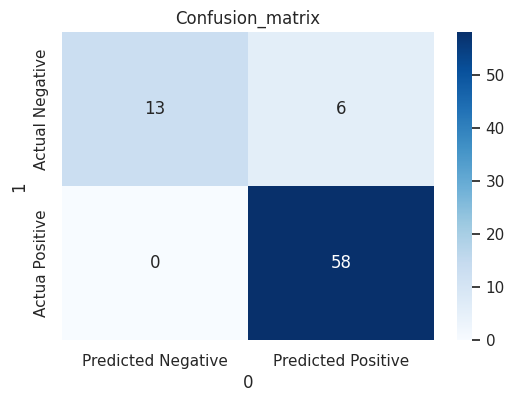

In [242]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Predicted Negative', 'Predicted Positive'],
yticklabels=['Actual Negative', 'Actua Positive'])
plt.xlabel('0')
plt.ylabel('1')
plt.title('Confusion_matrix')
plt.show()

Confusion matrix v řadě

In [243]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(13, 6, 0, 58)

Model Acuracy scores graficky

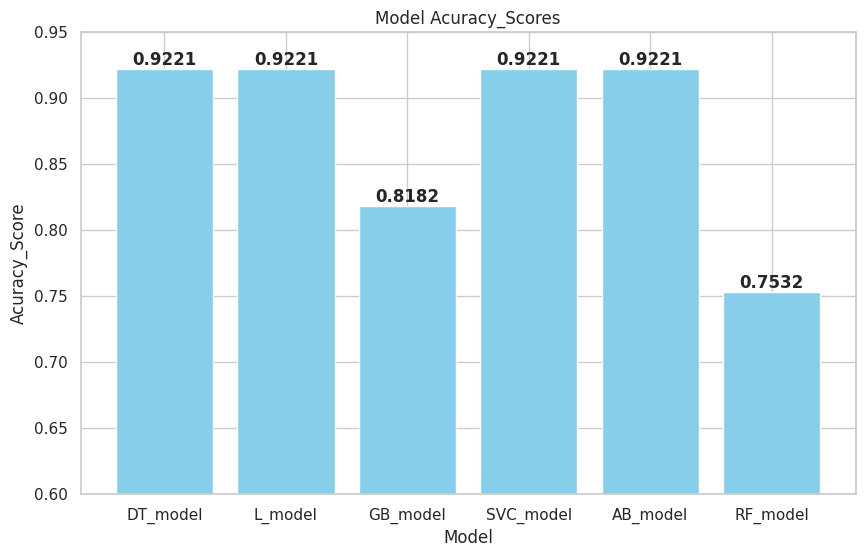

In [244]:
model_names = ['DT_model', 'L_model', 'GB_model', 'SVC_model', 'AB_model', 'RF_model']
Acuracy_score = [accuracy_DT, accuracy_L, accuracy_GB, accuracy_SVC, accuracy_AB, accuracy_RF]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, Acuracy_score, color='skyblue')
for bar, score in zip(bars, Acuracy_score):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(score, 4), ha='center', va='bottom', fontweight='bold')

plt.xlabel('Model')
plt.ylabel('Acuracy_Score')
plt.title('Model Acuracy_Scores')
plt.ylim([0.6, 0.95])
plt.show()